In [1]:
import numpy as np, pandas as pd
import datetime
from lightgbm import LGBMRegressor
from sklearn import preprocessing
from collections import Counter
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
from tqdm import tqdm_notebook
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.dates as mdates, seaborn as sns
from collections import Counter
import datetime, folium
sns.set()

np.random.seed(19)

In [2]:
train = pd.read_csv("./Files/train.csv", dtype = {'id': 'str'})
train['date'] = train['date'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8:])))

test = pd.read_csv("./Files/test.csv", dtype = {'id': 'str'})
test['date'] = test['date'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8:])))

In [3]:
latest_date = np.max(train['date'])
oldest_date = np.min(train['date'])
calendar = [oldest_date + datetime.timedelta(days = i) for i in range((latest_date - oldest_date).days + 1)]


cnt = Counter(train['date'].values)
sums = train.groupby('date', sort = False)['target'].sum().sort_values().to_dict()

Text(0.5,0,'Время')

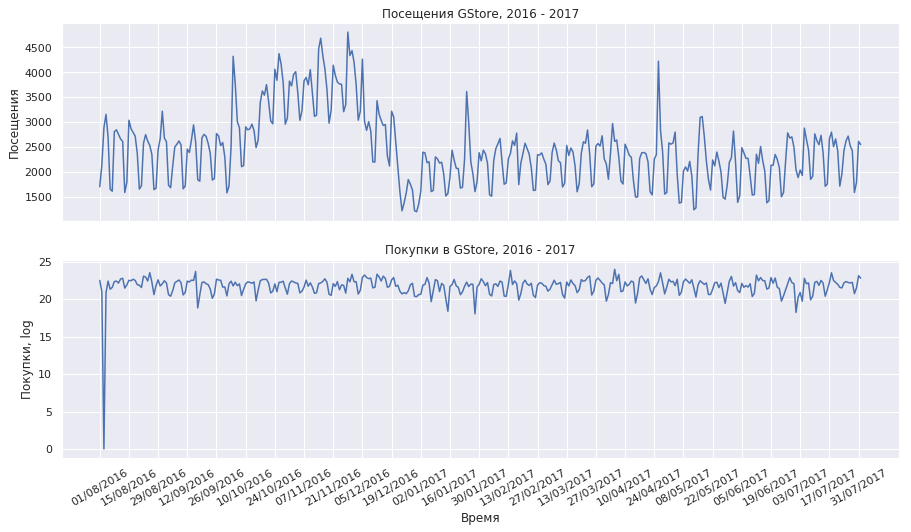

In [4]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Посещения GStore, 2016 - 2017')
plt.ylabel('Посещения')

plt.subplot(2, 1, 2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [np.log1p(sums[date]) for date in calendar])
plt.xticks(calendar[::14], rotation = 30)

plt.title('Покупки в GStore, 2016 - 2017')
plt.ylabel('Покупки, log')
plt.xlabel('Время')

In [5]:
fig.savefig('/home/ambitious/images/1.png', format='png', dpi=200, bbox_inches = 'tight')

Text(0.5,0,'Время')

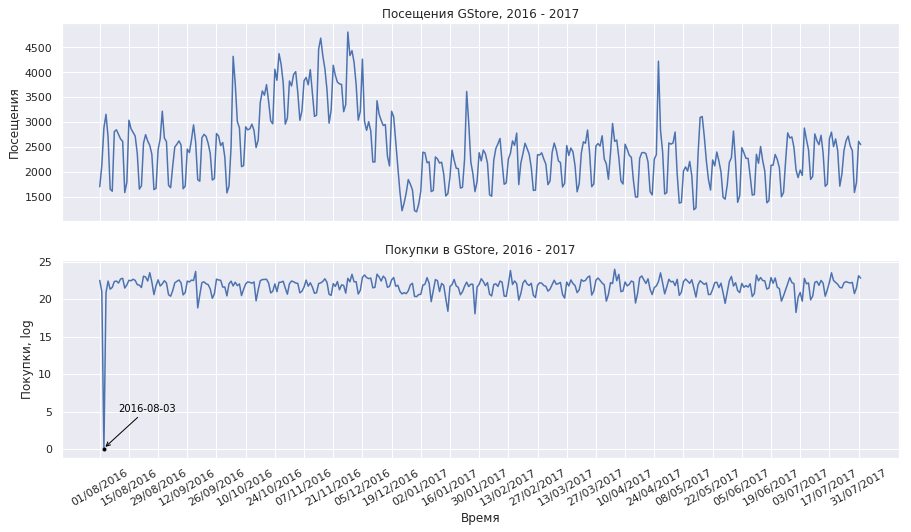

In [6]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Посещения GStore, 2016 - 2017')
plt.ylabel('Посещения')

plt.subplot(2, 1, 2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [np.log1p(sums[date]) for date in calendar])
plt.xticks(calendar[::14], rotation = 30)

plt.plot([datetime.date(2016, 8, 3)], [0], marker = '.', color = 'black')
plt.annotate(s = str(datetime.date(2016, 8, 3)), arrowprops = dict(arrowstyle='->', color = 'black'), xy = (datetime.date(2016, 8, 3), 0.1),color = 'black',
                xytext = (datetime.date(2016, 8, 10), 5))
plt.title('Покупки в GStore, 2016 - 2017')
plt.ylabel('Покупки, log')
plt.xlabel('Время')

In [7]:
fig.savefig('/home/ambitious/images/2.png', format='png', dpi=200, bbox_inches = 'tight')

Text(0.5,0,'Время')

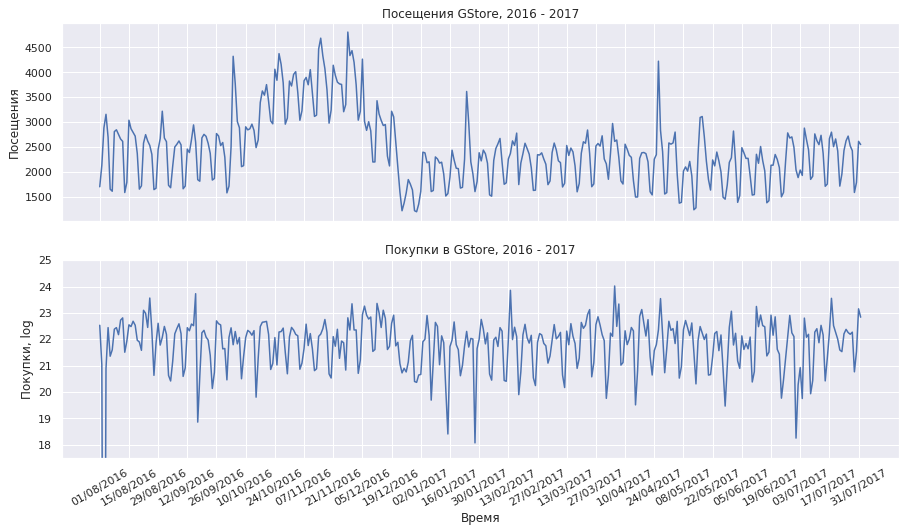

In [8]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Посещения GStore, 2016 - 2017')
plt.ylabel('Посещения')

plt.subplot(2, 1, 2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [np.log1p(sums[date]) for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.ylim(17.5, 25)
plt.title('Покупки в GStore, 2016 - 2017')
plt.ylabel('Покупки, log')
plt.xlabel('Время')

In [9]:
fig.savefig('/home/ambitious/images/3.png', format='png', dpi=200, bbox_inches = 'tight')

Text(0.5,0,'Время')

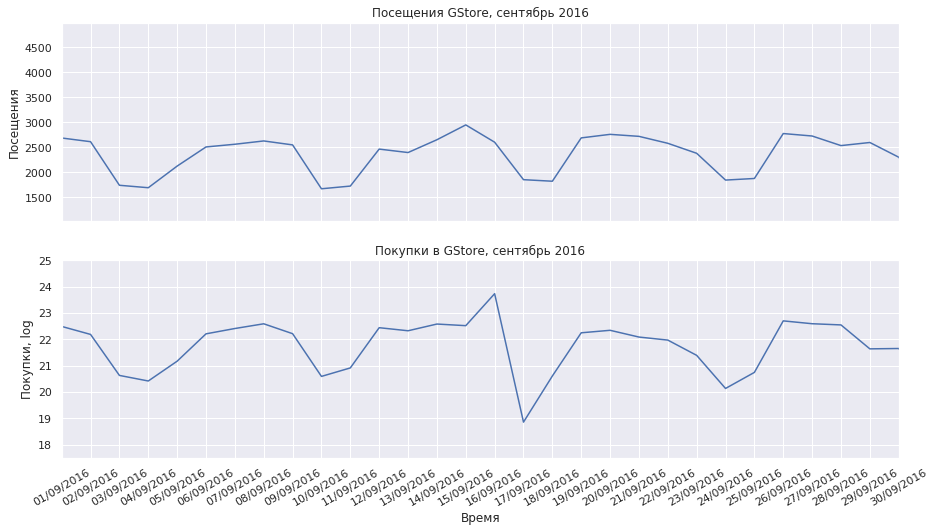

In [10]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar, rotation = 30)
plt.title('Посещения GStore, сентябрь 2016')
plt.xlim(calendar[31], calendar[60])
plt.ylabel('Посещения')

plt.subplot(2, 1, 2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [np.log1p(sums[date]) for date in calendar])
plt.xticks(calendar, rotation = 30)
plt.ylim(17.5, 25)
plt.xlim(calendar[31], calendar[60])
plt.title('Покупки в GStore, сентябрь 2016')
plt.ylabel('Покупки, log')
plt.xlabel('Время')

In [11]:
fig.savefig('/home/ambitious/images/4.png', format='png', dpi=200, bbox_inches = 'tight')

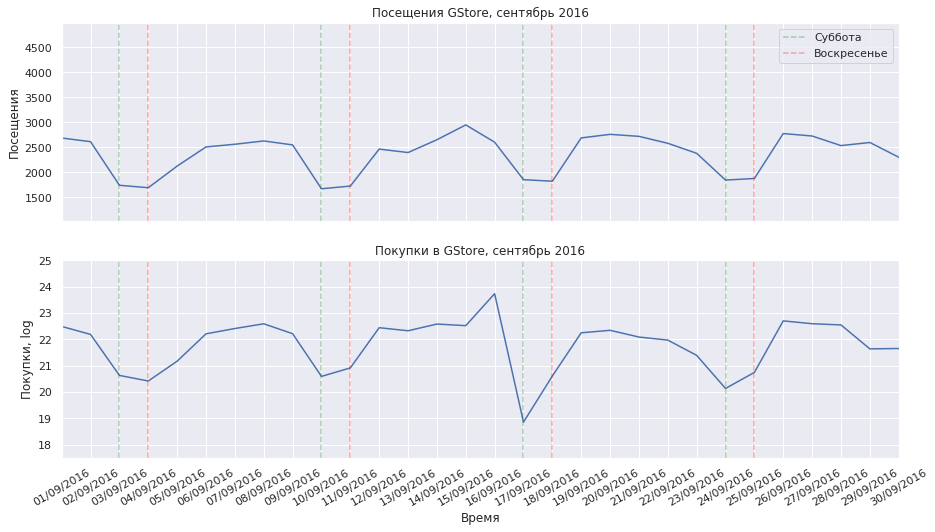

In [12]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar, rotation = 30)
plt.title('Посещения GStore, сентябрь 2016')
plt.xlim(calendar[31], calendar[60])
plt.ylabel('Посещения')
flg = 0
for el in list(calendar[5::7]):
    if flg == 0:
        plt.axvline(el, alpha = 0.3, color = 'green', ls = '--', label = 'Суббота')
        flg = 1
    else:
        plt.axvline(el, alpha = 0.3, color = 'green', ls = '--')
    
flg = 0
for el in list(calendar[6::7]):
    if flg == 0:
        plt.axvline(el, alpha = 0.3, color = 'red', ls = '--', label = 'Воскресенье')
        flg = 1
    else:
        plt.axvline(el, alpha = 0.3, color = 'red', ls = '--')
    
plt.legend()

plt.subplot(2, 1, 2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [np.log1p(sums[date]) for date in calendar])
plt.xticks(calendar, rotation = 30)
plt.ylim(17.5, 25)
plt.xlim(calendar[31], calendar[60])
plt.title('Покупки в GStore, сентябрь 2016')
plt.ylabel('Покупки, log')
plt.xlabel('Время')


for el in list(calendar[5::7]):
    plt.axvline(el, alpha = 0.3, color = 'green', ls = '--')

for el in list(calendar[6::7]):
    plt.axvline(el, alpha = 0.3, color = 'red', ls = '--')


In [13]:
fig.savefig('/home/ambitious/images/5.png', format='png', dpi=200, bbox_inches = 'tight')

In [95]:
calendar[300] + datetime.timedelta(365)

datetime.date(2017, 5, 28)

In [14]:
test_cnt = Counter(test['date'].values)
test_calendar = [el + datetime.timedelta(365) for el in calendar]

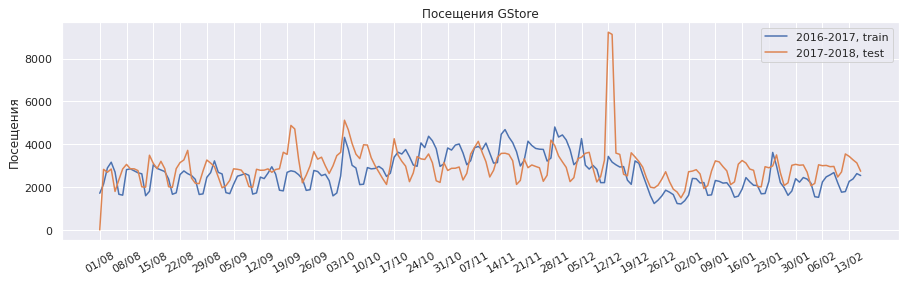

In [15]:
fig = plt.figure(figsize = (15, 4))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar[:200], [cnt[date] for date in calendar[:200]])
plt.plot(calendar[:200], [test_cnt[date] for date in test_calendar[:200]])
plt.xticks(calendar[:200:7], rotation = 30)
plt.title('Посещения GStore')
plt.ylabel('Посещения')
plt.legend(['2016-2017, train', '2017-2018, test'])

In [16]:
fig.savefig('/home/ambitious/images/6.png', format='png', dpi=200, bbox_inches = 'tight')

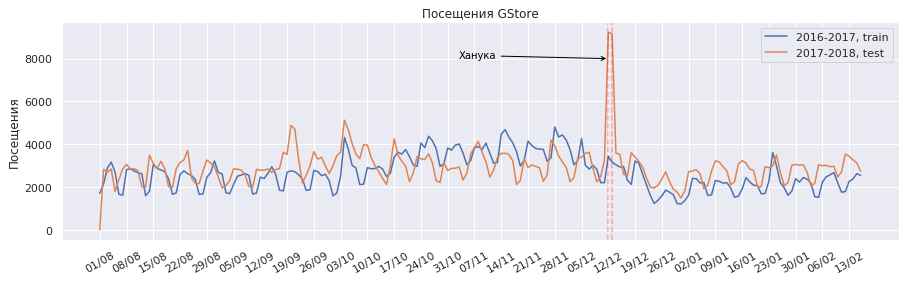

In [17]:
fig = plt.figure(figsize = (15, 4))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar[:200], [cnt[date] for date in calendar[:200]])
plt.plot(calendar[:200], [test_cnt[date] for date in test_calendar[:200]])
plt.xticks(calendar[:200:7], rotation = 30)
plt.axvline(x = datetime.date(2016, 12, 12), color = 'red', label = str(datetime.date(2017, 12, 12)), ls = '--', alpha = 0.3)
plt.axvline(x = datetime.date(2016, 12, 13), color = 'red', label = str(datetime.date(2017, 12, 13)), ls = '--', alpha = 0.3)
plt.annotate(s = 'Ханука', arrowprops = dict(arrowstyle='->', color = 'black'), xy = (datetime.date(2016, 12, 12), 8000),color = 'black',
                xytext = (datetime.date(2016, 11, 3), 8000))
plt.title('Посещения GStore')
plt.ylabel('Посещения')
plt.legend(['2016-2017, train', '2017-2018, test'])

In [18]:
fig.savefig('/home/ambitious/images/7.png', format='png', dpi=200, bbox_inches = 'tight')

In [20]:
col = 'geoNetwork_city'

In [21]:
train.rename({'not available in demo dataset': 'nan', '(not set)': 'nan'}, axis = 0, inplace = True)
train.drop(labels = train.index[train[col] == 'not available in demo dataset'], inplace = True)
train.drop(labels = train.index[train[col] == '(not set)'], inplace = True)
train.reset_index(inplace = True)

test.drop(labels = test.index[test[col] == 'not available in demo dataset'], inplace = True)
test.drop(labels = test.index[test[col] == '(not set)'], inplace = True)
test.reset_index(inplace = True)

In [22]:
n = 20
channel_cats = [el[0] for el in Counter(train[col].tolist() + test[col].tolist()).most_common()][:n]
cat2idx = dict((channel_cats[i], i + 1) for i in range(len(channel_cats)))

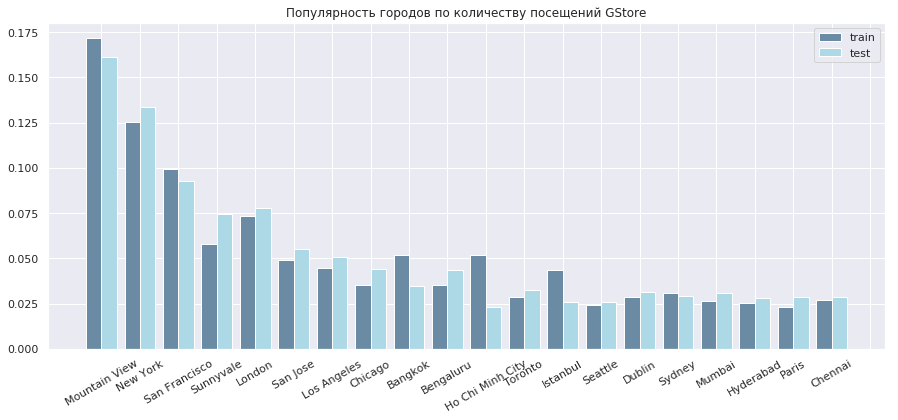

In [23]:
fig = plt.figure(figsize = (15, 6))
train_values = np.array(train.groupby('id', sort = False).apply(lambda x: cat2idx.get(Counter(x[col]).most_common()[0][0], 0)).tolist())
test_values = np.array(test.groupby('id', sort = False).apply(lambda x: cat2idx.get(Counter(x[col]).most_common()[0][0], 0)).tolist())

n, bins, patches = plt.hist(x = [train_values[train_values != 0], test_values[test_values != 0]], bins = len(channel_cats),
                            align = 'left', 
                           color = ['#6b8ba4', 'lightblue'], edgecolor = 'white', density = True)

plt.xticks(bins, channel_cats, rotation = 30)
plt.title('Популярность городов по количеству посещений GStore')
plt.legend(['train', 'test'])

In [24]:
fig.savefig('/home/ambitious/images/8.png', format='png', dpi=200, bbox_inches = 'tight')

In [25]:
col = 'geoNetwork_city'
n = 10
channel_cats = [el[0] for el in Counter(train[col].tolist() + test[col].tolist()).most_common()][:n]
cat2idx = dict((channel_cats[i], i + 1) for i in range(len(channel_cats)))

In [26]:
ts = train.groupby(['id', col], sort = False)['date'].min().groupby(col, sort = False).apply(lambda x: list(x.values))

test_ts = test.groupby(['id', col], sort = False)['date'].min().groupby(col, sort = False).apply(lambda x: list(x.values))

Text(0.5,0,'Время')

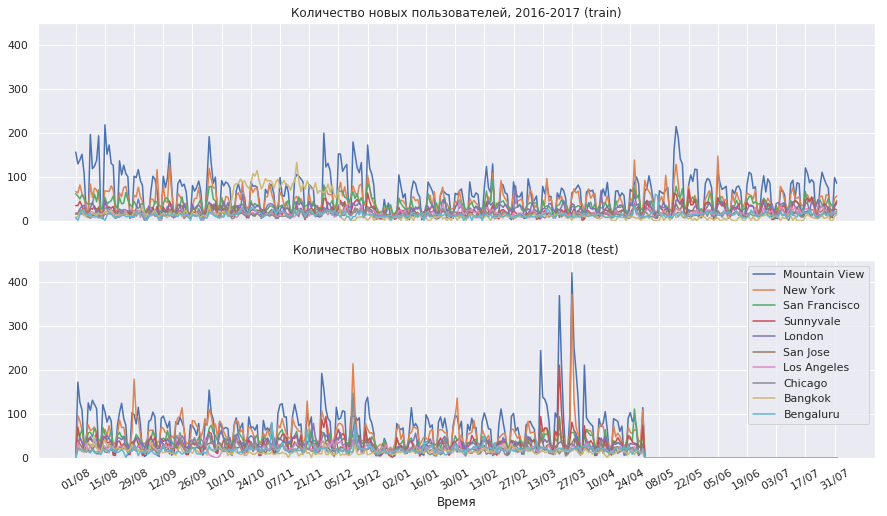

In [27]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)

cnts = []
for cat_col in channel_cats:
    cnts.append(Counter(ts[cat_col]))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for cnt in cnts:
    plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Количество новых пользователей, 2016-2017 (train)')
#plt.xlabel('Дата')
plt.ylim(0, 450)

plt.subplot(2, 1, 2)
cnts = []
for cat_col in channel_cats:
    cnts.append(Counter(test_ts[cat_col]))
    
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for cnt in cnts:
    plt.plot(test_calendar, [cnt[date] for date in test_calendar])
plt.xticks(test_calendar[::14], rotation = 30)
plt.title('Количество новых пользователей, 2017-2018 (test)')
plt.legend(channel_cats)
plt.ylim(0, 450)
plt.xlabel('Время')

In [28]:
fig.savefig('/home/ambitious/images/9.png', format='png', dpi=200, bbox_inches = 'tight')

In [29]:
col = 'geoNetwork_city'
n = 8
channel_cats = [el[0] for el in Counter(train[col].tolist() + test[col].tolist()).most_common()][:n]
cat2idx = dict((channel_cats[i], i + 1) for i in range(len(channel_cats)))

In [30]:
train['label'] = (train['target'] > 0).astype(int)

pos_ids = set(train.loc[train['label'] == 1, 'id'].unique())
neg_ids = set(train['id'].unique()).difference(pos_ids)
pos_train = train[train['id'].apply(lambda x: x in pos_ids)]
neg_train = train[train['id'].apply(lambda x: x in neg_ids)]

In [31]:
train_values = np.array(pos_train.groupby('id', sort = False)[col].apply(lambda x: cat2idx.get(Counter(x).most_common()[0][0], 0)).tolist())
test_values = np.array(neg_train.groupby('id', sort = False)[col].apply(lambda x: cat2idx.get(Counter(x).most_common()[0][0], 0)).tolist())

In [32]:
user_sums = pos_train.groupby('id', sort = False)['target'].sum()
med_sum = np.median(user_sums)

rich_users = set(user_sums[user_sums >= med_sum].index)
poor_users = set(user_sums[user_sums < med_sum].index)

rich_train = pos_train[pos_train['id'].apply(lambda x: x in rich_users)]
poor_train = pos_train[pos_train['id'].apply(lambda x: x in poor_users)]

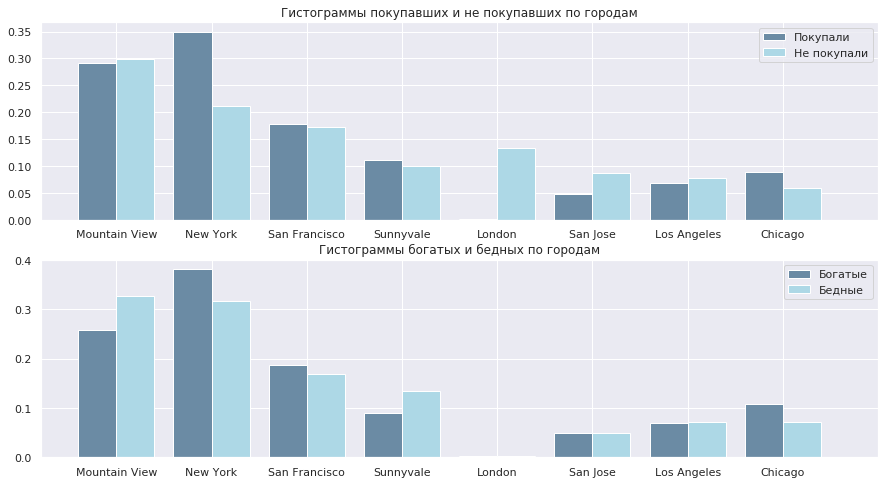

In [33]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)

n, bins, patches = plt.hist(x = [train_values[train_values != 0], test_values[test_values != 0]], bins = len(channel_cats),
                            align = 'left', color = ['#6b8ba4', 'lightblue'],
                            edgecolor = 'white', density = True)

plt.xticks(bins, channel_cats, rotation = 0)
plt.title('Гистограммы покупавших и не покупавших по городам')
plt.legend(['Покупали', 'Не покупали'], loc = 'upper right')

plt.subplot(2, 1, 2)

train_values = np.array(rich_train.groupby('id', sort = False)[col].apply(lambda x: cat2idx.get(Counter(x).most_common()[0][0], 0)).tolist())
test_values = np.array(poor_train.groupby('id', sort = False)[col].apply(lambda x: cat2idx.get(Counter(x).most_common()[0][0], 0)).tolist())

n, bins, patches = plt.hist(x = [train_values[train_values != 0], test_values[test_values != 0]], bins = len(channel_cats),
                            align = 'left', color = ['#6b8ba4', 'lightblue'],
                            edgecolor = 'white', density = True)

plt.xticks(bins, channel_cats, rotation = 0)
plt.title('Гистограммы богатых и бедных по городам')
plt.legend(['Богатые', 'Бедные'], loc = 'upper right')


In [34]:
fig.savefig('/home/ambitious/images/10.png', format='png', dpi=200, bbox_inches = 'tight')

In [35]:
channel_cats = [el[0] for el in Counter(train['channel'].tolist() + test['channel'].tolist()).most_common()][::-1]
cat2idx = dict((channel_cats[i], i) for i in range(len(channel_cats)))

# В тесте гораздо меньше доля social

In [36]:
cnts = []
for cat in channel_cats:
    cnts.append(Counter(train[train['channel'] == cat]['date']))

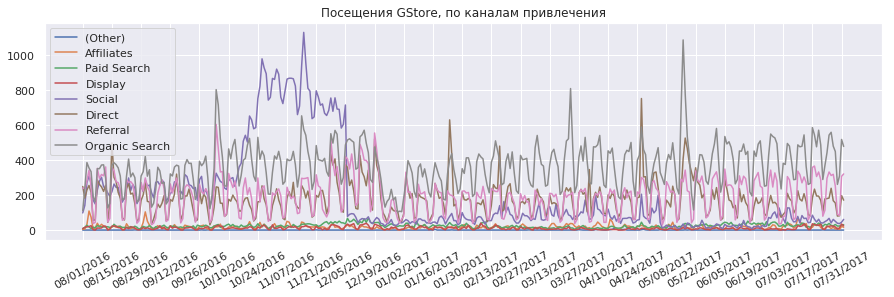

In [37]:
fig = plt.figure(figsize = (15, 4))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for cnt in cnts:
    plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Посещения GStore, по каналам привлечения')
#plt.xlabel('Дата')
#plt.ylim(0, 6000)
plt.legend(channel_cats)

In [38]:
fig.savefig('/home/ambitious/images/11.png', format='png', dpi=200, bbox_inches = 'tight')

In [39]:
train = pd.read_csv("./Files/train.csv", dtype = {'id': 'str'})
train['date'] = train['date'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8:])))

test = pd.read_csv("./Files/test.csv", dtype = {'id': 'str'})
test['date'] = test['date'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8:])))

In [40]:
col = 'device_operatingSystem'
n = 6
channel_cats = [el[0] for el in Counter(train[col].tolist() + test[col].tolist()).most_common()][:n][::-1]
cat2idx = dict((channel_cats[i], i + 1) for i in range(len(channel_cats)))

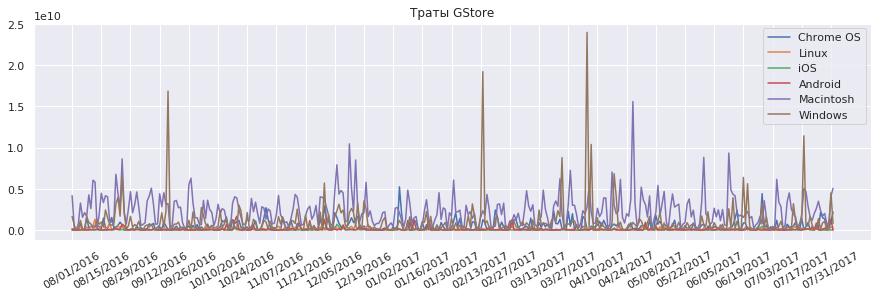

In [41]:
sums = []
for cat in channel_cats:
    sums.append(train[train[col] == cat].groupby('date', sort = False)['target'].sum())

fig = plt.figure(figsize = (15, 4))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for cat_sum in sums:
    plt.plot(calendar, cat_sum.loc[calendar, ])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Траты GStore')
#plt.xlabel('Дата')
#plt.ylim(0, 6000)
plt.legend(channel_cats)

In [42]:
fig.savefig('/home/ambitious/images/12.png', format='png', dpi=200, bbox_inches = 'tight')